In [1]:
!pip install -q kaggle


In [2]:
!mkdir ~/.kaggle


The syntax of the command is incorrect.


In [3]:
ls~/.kaggle

Invalid switch - ".kaggle".


In [4]:
!kaggle datasets download -d kalyankaparaju01/credit-card-fraud-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/kalyankaparaju01/credit-card-fraud-detection-dataset
License(s): unknown
credit-card-fraud-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile
with zipfile.ZipFile("credit-card-fraud-detection-dataset.zip","r") as file:
    file.extractall()

In [6]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Exploratory Data Analysis (EDA) Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Data Cleaning and Analysis Modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV

In [10]:
# Model Building Modules
from sklearn.linear_model import LogisticRegression

In [11]:
# Model Evaluation Modules
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import recall_score

In [12]:
df = pd.read_csv('fraudTrain.csv')
df.head()

,Index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [13]:
len(df)

1048575

In [14]:
#dtypes of the columns
df.dtypes

Index                      int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [15]:
#converting trans_date_trans_time into datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
print(df.dtypes['trans_date_trans_time'])


datetime64[ns]


In [16]:
# deriving additonal columns from 'trans_date_trans_time'
#deriving hour
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
#deriving 'day of the week'
df['trans_day_of_week'] = df['trans_date_trans_time'].dt.dayofweek + 1
df['trans_day_of_week'] = df['trans_day_of_week'].astype(int)
#deriving 'year_month'
df['trans_year_month'] = df['trans_date_trans_time'].dt.to_period('M')

In [17]:
#converting data types that should be categorical into "category"

df['category'] = df['category'].astype('category')
df['gender'] = df['gender'].astype('category')
df['is_fraud'] = df['is_fraud'].astype('category')

In [18]:
df.dtypes

Index                             int64
trans_date_trans_time    datetime64[ns]
cc_num                          float64
merchant                         object
category                       category
amt                             float64
first                            object
last                             object
gender                         category
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                       category
trans_hour                        int32
trans_day_of_week                 int32


In [19]:
#dropping variables which are not usefull for the Visualization and analytics
df.drop(['trans_date_trans_time','first', 'last', 'dob',] , axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype    
---  ------             --------------    -----    
 0   Index              1048575 non-null  int64    
 1   cc_num             1048575 non-null  float64  
 2   merchant           1048575 non-null  object   
 3   category           1048575 non-null  category 
 4   amt                1048575 non-null  float64  
 5   gender             1048575 non-null  category 
 6   street             1048575 non-null  object   
 7   city               1048575 non-null  object   
 8   state              1048575 non-null  object   
 9   zip                1048575 non-null  int64    
 10  lat                1048575 non-null  float64  
 11  long               1048575 non-null  float64  
 12  city_pop           1048575 non-null  int64    
 13  job                1048575 non-null  object   
 14  trans_num          1048575 non-null  object   
 15

In [21]:
#let us look at the number of unique values in the dataset
df.nunique()

Index                1048575
cc_num                   943
merchant                 693
category                  14
amt                    48602
gender                     2
street                   965
city                     879
state                     51
zip                      952
lat                      950
long                     951
city_pop                 865
job                      493
trans_num            1048575
unix_time            1030650
merch_lat            1016437
merch_long           1034825
is_fraud                   2
trans_hour                24
trans_day_of_week          7
trans_year_month          15
dtype: int64

In [22]:
df.sample()

,Index,cc_num,merchant,category,amt,gender,street,city,state,zip,...,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month
689726,689726,6.761180e+11,fraud_Marks Inc,gas_transport,50.98,F,674 Maureen Summit Apt. 276,Scotts Mills,OR,97375,...,1252,"Engineer, petroleum",f2e540571b4155e20274061e89ddcba4,1350793809,44.518108,-122.548156,0,4,1,2019-10


In [23]:
#determing the shape of the dataset
df.shape

(1048575, 22)

In [24]:
df.columns

Index(['Index', 'cc_num', 'merchant', 'category', 'amt', 'gender', 'street',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_hour',
       'trans_day_of_week', 'trans_year_month'],
      dtype='object')

In [25]:
#describing the dataset
df.describe()

,Index,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day_of_week
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242870e+05,4.171565e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,1.280077e+01,4.135594e+00
std,3.026977e+05,1.308811e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,6.816861e+00,2.200499e+00
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.000000e+00
25%,2.621435e+05,1.800400e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,7.000000e+00,2.000000e+00
50%,5.242870e+05,3.520550e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,1.400000e+01,4.000000e+00
75%,7.864305e+05,4.642260e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,1.900000e+01,6.000000e+00
max,1.048574e+06,4.992350e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,2.300000e+01,7.000000e+00


# **checking null values**

In [26]:
# checking the number of missing values in each column
df.isnull().sum()

Index                0
cc_num               0
merchant             0
category             0
amt                  0
gender               0
street               0
city                 0
state                0
zip                  0
lat                  0
long                 0
city_pop             0
job                  0
trans_num            0
unix_time            0
merch_lat            0
merch_long           0
is_fraud             0
trans_hour           0
trans_day_of_week    0
trans_year_month     0
dtype: int64

In [27]:
# distribution of legit transactions & fraudulent transactions
df['is_fraud'].value_counts()

is_fraud
0    1042569
1       6006
Name: count, dtype: int64

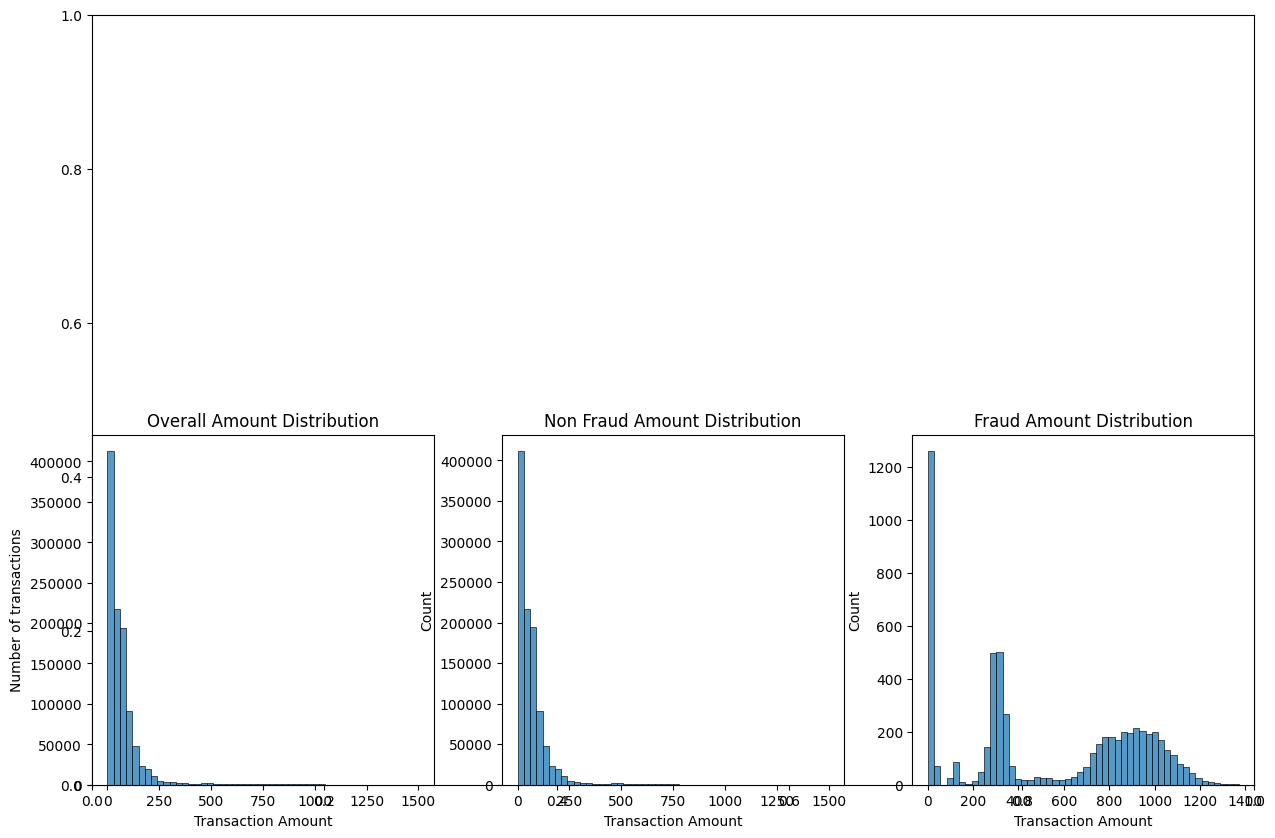

In [28]:
#plotting the above distributions
fig = plt.subplots(figsize=(15,10))

plots = []
#plotting the amt feature

#distribution plots
plots.append(sns.histplot(df[df.amt <= 1500].amt, bins=50, ax=plt.subplot(234)))
plots.append(sns.histplot(df[(df.is_fraud==0) & (df.amt<=1500)].amt, bins=50, ax=plt.subplot(235)))
plots.append(sns.histplot(df[(df.is_fraud==1) & (df.amt<=1500)].amt, bins=50, ax=plt.subplot(236)))

#setting titles
plots[0].set_title('Overall Amount Distribution')
plots[1].set_title('Non Fraud Amount Distribution')
plots[2].set_title('Fraud Amount Distribution')

#setting x labels
plots[0].set_xlabel('Transaction Amount')
plots[1].set_xlabel('Transaction Amount')
plots[2].set_xlabel('Transaction Amount')

#setting y label
plots[0].set_ylabel('Number of transactions')

plt.show()

In [29]:
#year_month vs number of transactions
df_timeline01 = df.groupby(df['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['year_month','num_of_transactions','customers']
df_timeline01

,year_month,num_of_transactions,customers
0,2019-01,52525,893
1,2019-02,49866,898
2,2019-03,70939,896
3,2019-04,68078,893
4,2019-05,72532,890
5,2019-06,86064,888
6,2019-07,86596,890
7,2019-08,87359,891
8,2019-09,70652,893
9,2019-10,68758,891


C:\Users\nikha\AppData\Local\Temp\ipykernel_3848\3123960031.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1 = sns.countplot(x='state', data=df[df['is_fraud'] == 1], order=state_order, palette='Set2', ax=ax1)
C:\Users\nikha\AppData\Local\Temp\ipykernel_3848\3123960031.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)


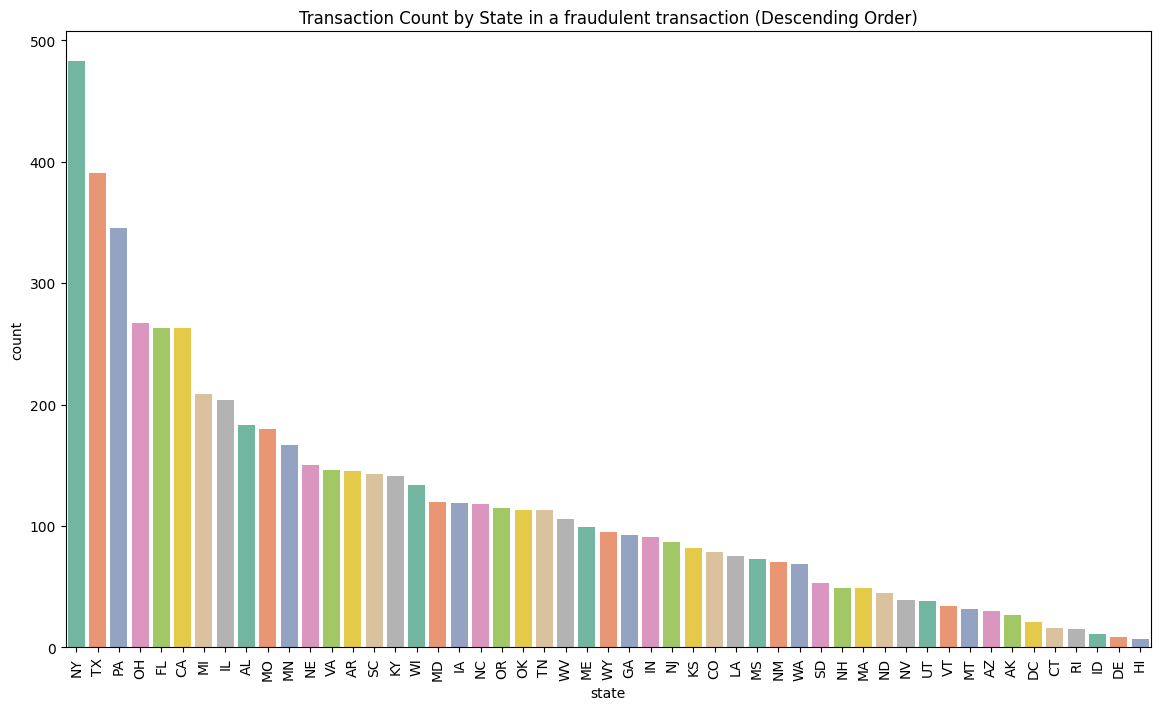

In [30]:
# Set up the plot for is_fraud = 1
fig, ax1 = plt.subplots(figsize=(14, 8))

# Get the order of states by their count in descending order
state_order = df[df['is_fraud'] == 1]['state'].value_counts().index

# Plotting the count of each state for is_fraud = 1
plot1 = sns.countplot(x='state', data=df[df['is_fraud'] == 1], order=state_order, palette='Set2', ax=ax1)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)

ax1.set_title('Transaction Count by State in a fraudulent transaction (Descending Order)')

# Show the plot for is_fraud = 1
plt.show()

In [31]:
# Calculate fraud ratios for all states
fraud_ratios = []

for state in df['state'].unique():
    total_count = df[df['state'] == state].shape[0]
    fraud_count = df[(df['state'] == state) & (df['is_fraud'] == 1)].shape[0]
    ratio = fraud_count / total_count if total_count > 0 else 0
    fraud_ratios.append({'State': state, 'Fraud Ratio': ratio, 'Total Transactions': total_count})

# Create a DataFrame from the list of dictionaries
fraud_ratio_df = pd.DataFrame(fraud_ratios)

# Print the DataFrame
print(fraud_ratio_df)

   State  Fraud Ratio  Total Transactions
0     NC     0.004778               24697
1     WA     0.004524               15251
2     ID     0.002440                4509
3     MT     0.003385                9454
4     VA     0.006178               23631
5     PA     0.005351               64475
6     KS     0.004407               18606
7     TN     0.007996               14132
8     IA     0.005488               21682
9     WV     0.005100               20784
10    FL     0.007580               34695
11    CA     0.005754               45711
12    NM     0.005258               13314
13    NJ     0.004362               19943
14    OK     0.005259               21485
15    IN     0.004089               22253
16    MA     0.004915                9970
17    TX     0.005096               76731
18    WI     0.005643               23745
19    MI     0.005615               37219
20    WY     0.006076               15636
21    HI     0.003433                2039
22    NE     0.007639             

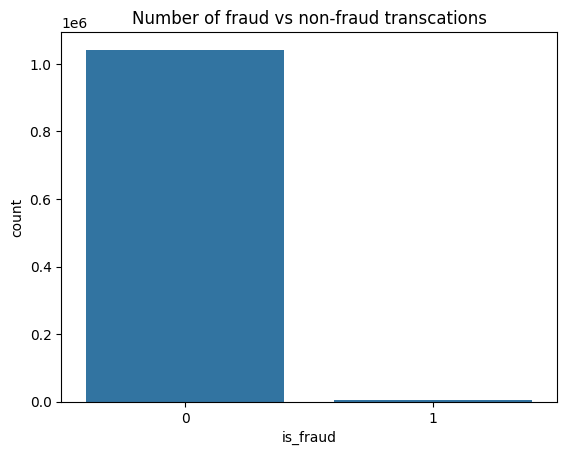

In [32]:
sns.countplot(x='is_fraud', data = df)
plt.title('Number of fraud vs non-fraud transcations')
plt.show()

# **CLASS DISTRIBUTION**

In [33]:
# separating the data for analysis
legit = df[df.is_fraud == 0]
fraud = df[df.is_fraud == 1]

In [34]:
print(legit.shape)
print(fraud.shape)

(1042569, 22)
(6006, 22)


In [35]:
fraud['is_fraud'].value_counts()

is_fraud
1    6006
0       0
Name: count, dtype: int64

In [36]:
legit['is_fraud'].value_counts()

is_fraud
0    1042569
1          0
Name: count, dtype: int64

In [37]:
fnew = legit.sample(n=6006)

In [38]:
d_new = pd.concat([fnew, fraud], axis=0)

In [39]:
d_new['is_fraud'].value_counts()

is_fraud
0    6006
1    6006
Name: count, dtype: int64

In [40]:
d_new.shape

(12012, 22)

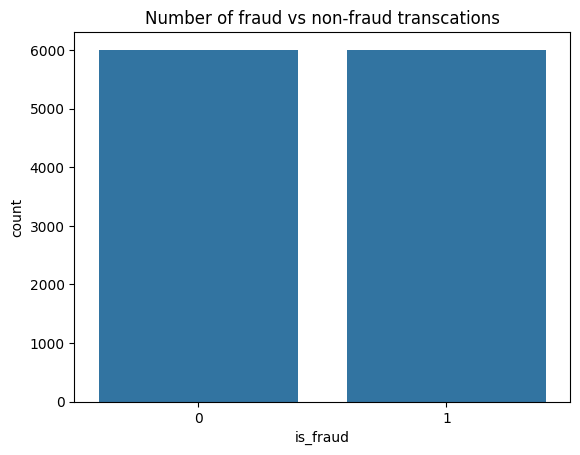

In [41]:
sns.countplot(x='is_fraud', data = d_new)
plt.title('Number of fraud vs non-fraud transcations')
plt.show()

In [42]:
# Import library
from sklearn.model_selection import train_test_split

In [43]:
X =  [ 'amt', 'gender','lat', 'long', 'city_pop',  'trans_hour','trans_day_of_week','is_fraud']
d_new= pd.get_dummies(d_new[X], drop_first=True)
predictors =  [ 'amt',  'city_pop', 'trans_hour', 'gender_M','lat', 'long','trans_day_of_week']


In [44]:
# partition data
X = d_new[predictors]
Y = d_new[ 'is_fraud_1']

In [45]:
# Splitting data into train and test set 80:20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

In [46]:
print(X.shape, X_train.shape, X_test.shape)


(12012, 7) (9609, 7) (2403, 7)


In [47]:
print(X)

            amt  city_pop  trans_hour  gender_M      lat      long  \
94351     42.11      2870          11      True  33.4783  -90.5142   
597413    87.36      1446           9      True  45.2857 -108.9082   
445062   152.90       828           0      True  43.1699  -72.8515   
971060    26.20      5512          17      True  38.5072  -81.8900   
1026208   11.97      1831          14      True  39.8788  -82.1880   
...         ...       ...         ...       ...      ...       ...   
1047089  690.49       343           3     False  43.7557  -97.5936   
1047157  324.74     13602           4      True  32.7004  -97.6039   
1047208  331.33       343           4     False  43.7557  -97.5936   
1047521  356.20       343           8     False  43.7557  -97.5936   
1047918  249.56       343          12     False  43.7557  -97.5936   

         trans_day_of_week  
94351                    1  
597413                   2  
445062                   3  
971060                   1  
1026208       

# **MODELS**

In [48]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score, precision_score, recall_score
results = pd.DataFrame(columns=['Model Name', 'Accuracy', 'F1-score', 'ROC','precision','recall'])

In [49]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# **logistic regression**

In [50]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [51]:
# Instantiate the model with best C
logistic = LogisticRegression(C=0.01)

In [52]:
# Fit the model on the train set
logistic_model = logistic.fit(X_train, Y_train)

c:\Users\nikha\Downloads\python floder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
# Prepare results function
def display_test_results(model_name, model):
    
    # Prediction on the test set
    Y_test_pred = model.predict(X_test)
    
    # Confusion matrix
    print("------------------ Confusion Matrix --------------------")
    c_matrix = metrics.confusion_matrix(Y_test, Y_test_pred)
    print(c_matrix)
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
    cm_display.plot(cmap=plt.cm.Blues)
    plt.show()
    

    # classification_report
    print("------------------ classification_report --------------------")
    print(classification_report(Y_test, Y_test_pred))
    
    print("------------------ More Specific classification_report --------------------")
    TP = c_matrix[1,1] # true positive 
    TN = c_matrix[0,0] # true negatives
    FP = c_matrix[0,1] # false positives
    FN = c_matrix[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(Y_test, Y_test_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(Y_test, Y_test_pred))

    # Predicted probability
    Y_test_pred_proba = model.predict_proba(X_test)[:,1]

    # roc_auc
    print("------------------ ROC --------------------")
    roc_auc = metrics.roc_auc_score(Y_test, Y_test_pred_proba)

    # Plot the ROC curve
    draw_roc(Y_test, Y_test_pred_proba)

       # add all metrics score in final result store
    results.loc[len(results)] = [model_name, metrics.accuracy_score(Y_test, Y_test_pred), f1_score(Y_test, Y_test_pred), precision_score(Y_test, Y_test_pred), 
    recall_score(Y_test, Y_test_pred),roc_auc]

    return None

------------------ Confusion Matrix --------------------
[[1097   60]
 [ 314  932]]


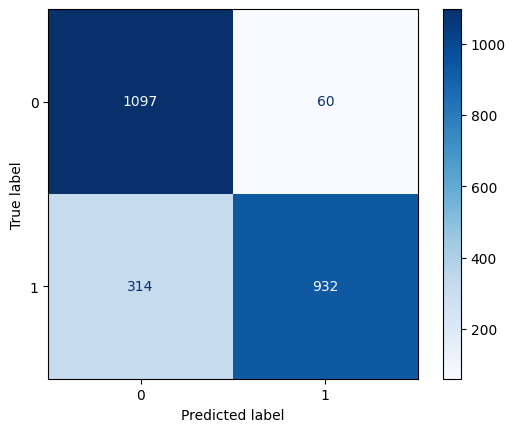

------------------ classification_report --------------------
              precision    recall  f1-score   support

       False       0.78      0.95      0.85      1157
        True       0.94      0.75      0.83      1246

    accuracy                           0.84      2403
   macro avg       0.86      0.85      0.84      2403
weighted avg       0.86      0.84      0.84      2403

------------------ More Specific classification_report --------------------
Accuracy:- 0.844361215147732
Sensitivity:- 0.7479935794542536
Specificity:- 0.9481417458945549
F1-Score:- 0.8328865058087578
------------------ ROC --------------------


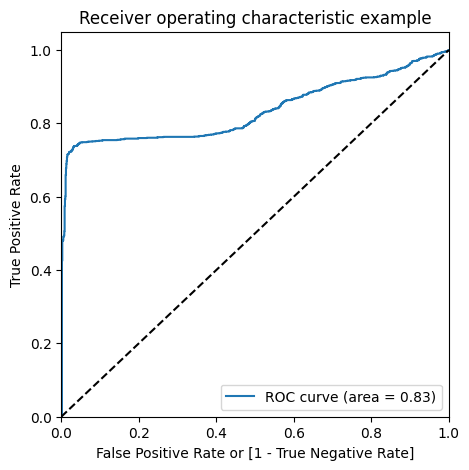

In [54]:
display_test_results("Logistic Regression", logistic_model)

# **RANDOM FOREST**

In [55]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [56]:
random_forest_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [57]:
# Fit the model
random_forest_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

------------------ Confusion Matrix --------------------
[[1068   89]
 [  87 1159]]


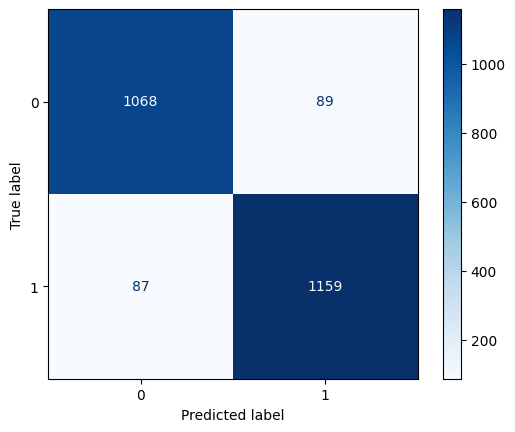

------------------ classification_report --------------------
              precision    recall  f1-score   support

       False       0.92      0.92      0.92      1157
        True       0.93      0.93      0.93      1246

    accuracy                           0.93      2403
   macro avg       0.93      0.93      0.93      2403
weighted avg       0.93      0.93      0.93      2403

------------------ More Specific classification_report --------------------
Accuracy:- 0.9267582188930503
Sensitivity:- 0.9301765650080257
Specificity:- 0.9230769230769231
F1-Score:- 0.9294306335204491
------------------ ROC --------------------


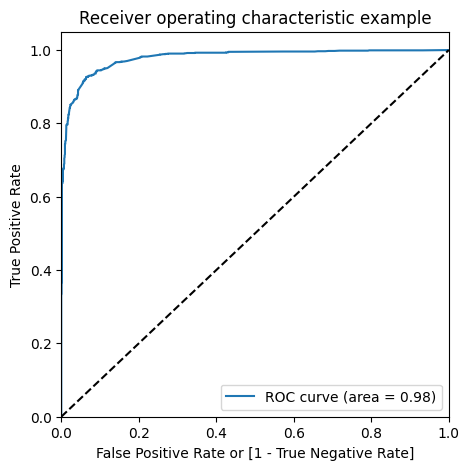

In [58]:
display_test_results("Random Forest", random_forest_model)

# **DECISION TREE**

In [59]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [60]:
# Model with optimal hyperparameters
decision_tree_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

decision_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

------------------ Confusion Matrix --------------------
[[1072   85]
 [  88 1158]]


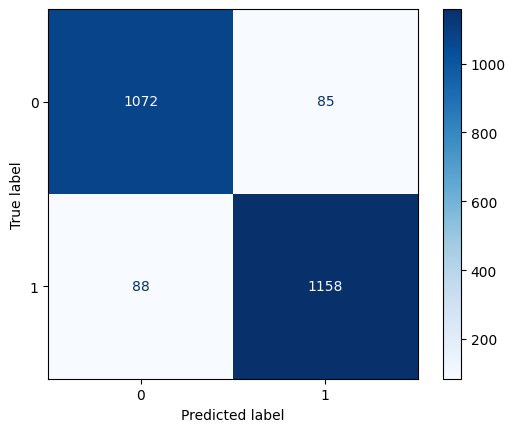

------------------ classification_report --------------------
              precision    recall  f1-score   support

       False       0.92      0.93      0.93      1157
        True       0.93      0.93      0.93      1246

    accuracy                           0.93      2403
   macro avg       0.93      0.93      0.93      2403
weighted avg       0.93      0.93      0.93      2403

------------------ More Specific classification_report --------------------
Accuracy:- 0.928006658343737
Sensitivity:- 0.9293739967897271
Specificity:- 0.9265341400172861
F1-Score:- 0.9304941743672157
------------------ ROC --------------------


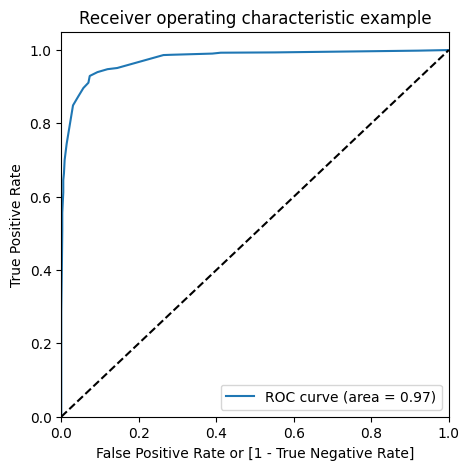

In [61]:
display_test_results("Decision Tree", decision_tree_model)

In [62]:
results.sort_values(by="ROC", ascending=False)

,Model Name,Accuracy,F1-score,ROC,precision,recall
0,Logistic Regression,0.844361,0.832887,0.939516,0.747994,0.834334
2,Decision Tree,0.928007,0.930494,0.931617,0.929374,0.974589
1,Random Forest,0.926758,0.929431,0.928686,0.930177,0.979218


# **SHAP**

In [63]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


In [64]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [65]:
import xgboost as xgb
import shap
shap.initjs()

c:\Users\nikha\Downloads\python floder\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [66]:
# train xg boost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state =0)


In [67]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [68]:
# explain prediction with shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

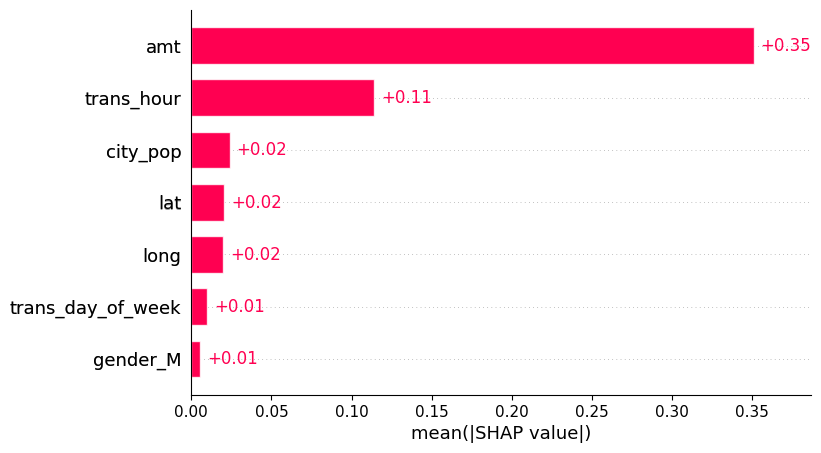

In [69]:
#Mean SHAP
shap.plots.bar(shap_values)

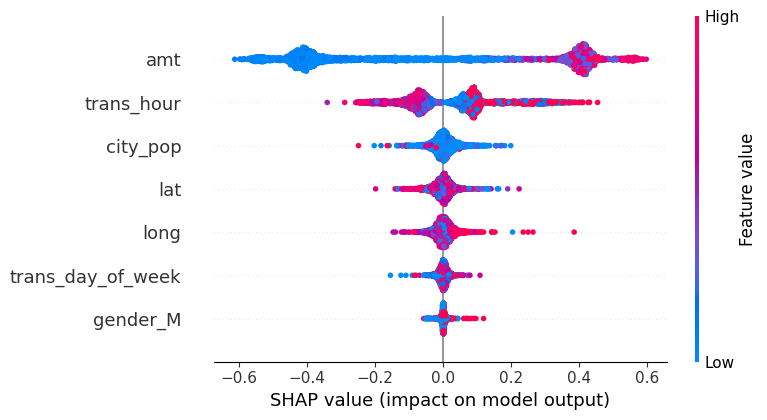

In [70]:
#summary plot of shap values
shap.summary_plot(shap_values,X_test)

# **LIME** 

In [71]:
!pip install lime

In [72]:
pip install --upgrade xgboost lime


Note: you may need to restart the kernel to use updated packages.


In [73]:
!pip install scikit-learn

In [74]:
#lime package 
import lime
import lime.lime_tabular

In [80]:
# Example setup
from sklearn.preprocessing import LabelEncoder

# Assuming df is your original DataFrame and X_train is your training set
# Identify categorical columns in the DataFrame
categorical_columns = d_new.select_dtypes(include=['object']).columns.tolist()

# Convert categorical columns to indices
categorical_features_indices = [X_train.columns.get_loc(col) for col in categorical_columns]

# Define categorical names for LIME explainer
categorical_names = {i: d_new[col].unique().tolist() for i, col in zip(categorical_features_indices, categorical_columns)}

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    mode='classification',
    training_labels=Y_train,
    feature_names=X_train.columns.tolist(),
    categorical_features=categorical_features_indices,
    categorical_names=categorical_names
)


In [85]:
import xgboost as xgb
import lime.lime_tabular

# Assuming X_train, y_train are your training data
model = xgb.XGBClassifier()  # Change from XGBRegressor to XGBClassifier
model.fit(X_train, Y_train)

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    mode='classification',
    training_labels=Y_train,
    feature_names=X_train.columns.tolist(),
    categorical_features=categorical_features_indices,
    categorical_names=categorical_names
)

# Choose an instance to explain
i = 0  # Index of the instance to explain
instance = X_test.iloc[i]  # Extract the instance

# Explain the instance's prediction
explanation = explainer.explain_instance(instance, model.predict_proba, num_features=10)

# Display the explanation
explanation.show_in_notebook(show_all=False)
print(explanation.as_list())


c:\Users\nikha\Downloads\python floder\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\nikha\Downloads\python floder\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\nikha\Downloads\python floder\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame 

[('19.74 < amt <= 85.21', -0.5188072531141554), ('15.00 < trans_hour <= 22.00', -0.14580275910552024), ('city_pop <= 759.00', 0.033759555804390516), ('2.00 < trans_day_of_week <= 4.00', -0.01925332772580993), ('lat > 42.10', -0.009920432781160381), ('gender_M <= 0.00', -0.007264520202401559), ('long <= -96.70', 0.006031451024483381)]


In [92]:
explanation.as_list()

[('19.74 < amt <= 85.21', -0.5188072531141554),
 ('15.00 < trans_hour <= 22.00', -0.14580275910552024),
 ('city_pop <= 759.00', 0.033759555804390516),
 ('2.00 < trans_day_of_week <= 4.00', -0.01925332772580993),
 ('lat > 42.10', -0.009920432781160381),
 ('gender_M <= 0.00', -0.007264520202401559),
 ('long <= -96.70', 0.006031451024483381)]